# 吴楠楠 3220190895

In [1]:
import numpy as np
import pandas as pd
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
from collections import Counter

# 1 酒店基本情况

In [2]:
warnings.filterwarnings("ignore")
hotel_df = pd.read_csv("D:/python/data/hotel_bookings.csv")
length = len(hotel_df)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 1.1 缺失值处理
该数据集中只有三个属性有缺失值，company的缺失值太多删除该列，children和agent中删除缺失值。

In [3]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))
missing_data(hotel_df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
Total,0,0,0,0,0,0,0,0,0,0,...,0,16340,112593,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,13.6862,94.3069,0,0,0,0,0,0,0
Types,object,int64,int64,int64,object,int64,int64,int64,int64,int64,...,object,float64,float64,int64,object,float64,int64,int64,object,object


In [4]:
hotel_df.drop('company', axis=1, inplace=True)
missing_replacements = {'children': 0.0, 'country': 'Unknown', 'agent': 0.0}
hotel_df = hotel_df.fillna(missing_replacements)

## 1.2 预定情况

Text(0, 0.5, 'Total Count')

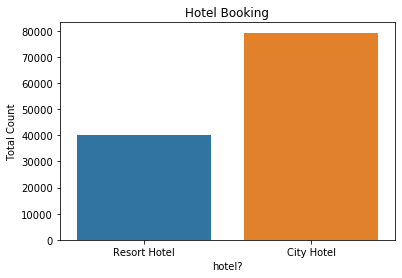

In [5]:
ax = sns.countplot(x="hotel", data=hotel_df)
plt.title('Hotel Booking')
plt.xlabel('hotel?')
plt.ylabel('Total Count')

In [6]:
pd.value_counts(hotel_df['hotel'])

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

相较来看，预定城市酒店的人数远高于度假酒店。

## 1.3 入住情况

Text(0, 0.5, 'Number of bookings')

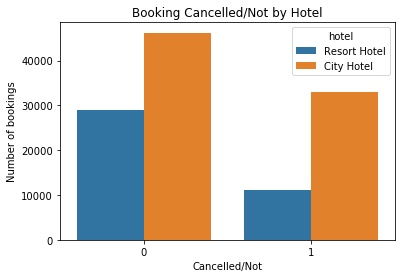

In [7]:
sns.countplot(x = 'is_canceled', hue="hotel", data=hotel_df)
plt.title("Booking Cancelled/Not by Hotel")
plt.xlabel("Cancelled/Not")
plt.ylabel("Number of bookings")

In [8]:
resort_guests1 = hotel_df[(hotel_df['hotel'] == 'Resort Hotel')]
city_guests1 = hotel_df[(hotel_df['hotel'] == 'City Hotel')]
resort_guests = hotel_df[(hotel_df['hotel'] == 'Resort Hotel') & (hotel_df['is_canceled'] == 0)]
city_guests = hotel_df[(hotel_df['hotel'] == 'City Hotel') & (hotel_df['is_canceled'] == 0)]
resort_rate = len(resort_guests)/len(resort_guests1)
city_rate = len(city_guests)/len(city_guests1)
print('城市酒店入住率：{}，度假酒店入住率{}'.format(round(resort_rate,3),round(city_rate,3)))

城市酒店入住率：0.722，度假酒店入住率0.583


# 2 用户行为

## 2.1 数值属性
主要包括：提前预订时间、入住时长、顾客人数（成人+儿童+婴儿）以及平均房价，分别计算了其的五数概括，并用直方图以及盒图进行了可视化。

In [9]:
hotel_df['number_of_guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']
hotel_df['stays_night'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']

In [10]:
quant_cols = list(hotel_df.select_dtypes(include=['int64','float64']))
quant_cols = [x for x in quant_cols if x == 'lead_time' or x == 'stays_night' or x =='number_of_guests' or x == 'adr' ]
hotel_df[quant_cols].describe()

,lead_time,adr,number_of_guests,stays_night
count,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,101.831122,1.968239,3.427900
std,106.863097,50.535790,0.722394,2.557439
min,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,69.290000,2.000000,2.000000
50%,69.000000,94.575000,2.000000,3.000000
75%,160.000000,126.000000,2.000000,4.000000
max,737.000000,5400.000000,55.000000,69.000000


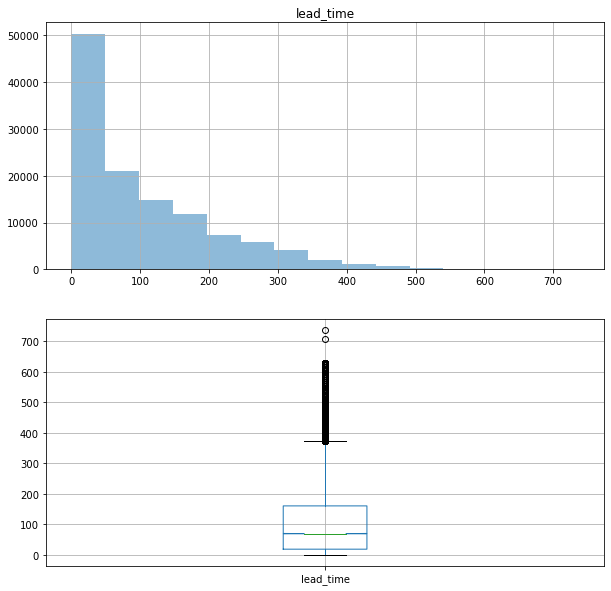

In [11]:
plt.figure(figsize=(10, 10))
#直方图
plt.subplot(2,1,1)
plt.title("lead_time")
hotel_df['lead_time'].hist(alpha=0.5,bins=15)

#盒图
plt.subplot(2,1,2)
hotel_df['lead_time'].plot(kind='box', notch=True, grid=True)
plt.show()

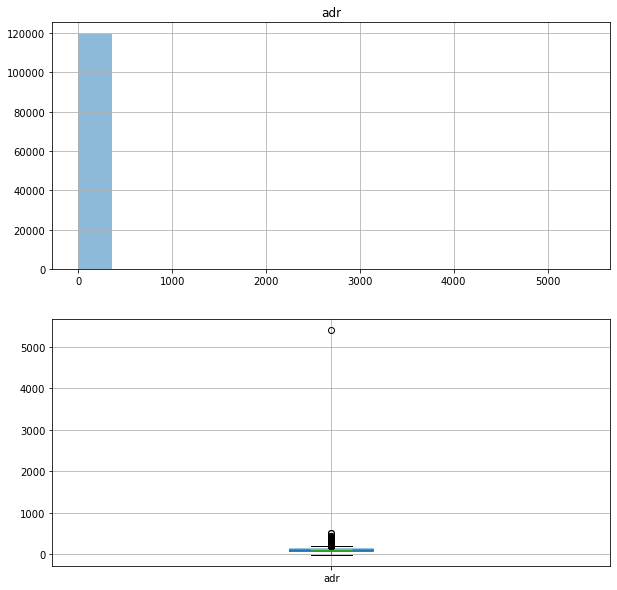

In [12]:
plt.figure(figsize=(10, 10))
#直方图
plt.subplot(2,1,1)
plt.title("adr")
hotel_df['adr'].hist(alpha=0.5,bins=15)

#盒图
plt.subplot(2,1,2)
hotel_df['adr'].plot(kind='box', notch=True, grid=True)
plt.show()

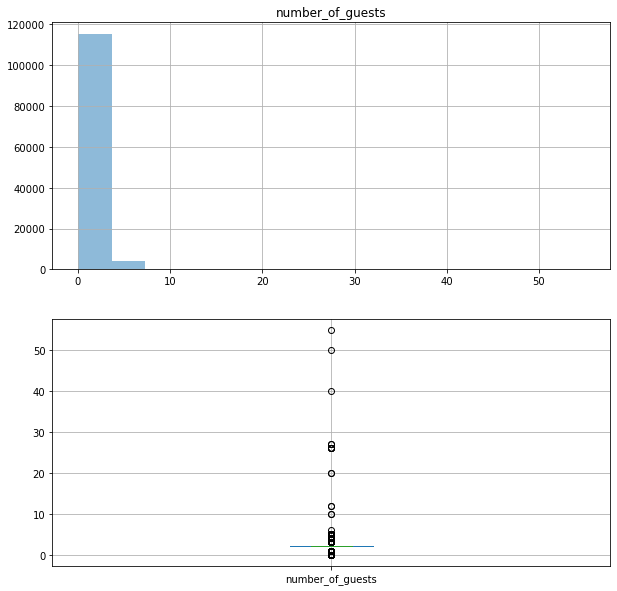

In [13]:
plt.figure(figsize=(10, 10))
#直方图
plt.subplot(2,1,1)
plt.title("number_of_guests")
hotel_df['number_of_guests'].hist(alpha=0.5,bins=15)

#盒图
plt.subplot(2,1,2)
hotel_df['number_of_guests'].plot(kind='box', notch=True, grid=True)
plt.show()

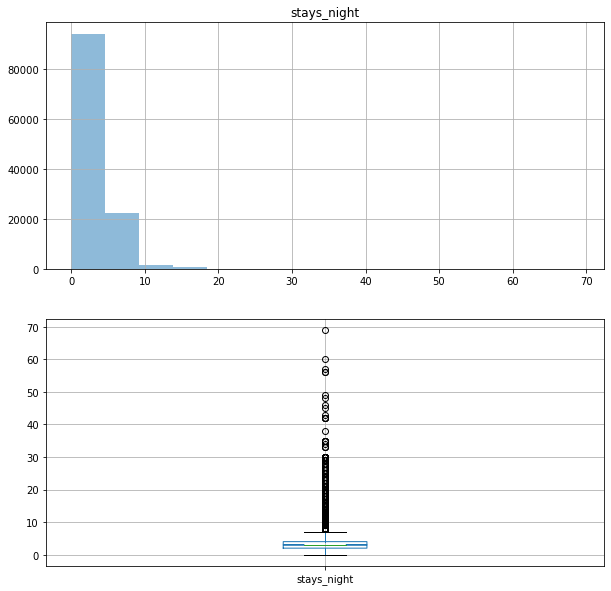

In [14]:
plt.figure(figsize=(10, 10))
#直方图
plt.subplot(2,1,1)
plt.title("stays_night")
hotel_df['stays_night'].hist(alpha=0.5,bins=15)

#盒图
plt.subplot(2,1,2)
hotel_df['stays_night'].plot(kind='box', notch=True, grid=True)
plt.show()

## 2.2 标称属性
主要是餐饮情况，多数人选择的是BB –住宿加早餐酒店，而FB –全食宿（早餐，午餐和晚餐）的情况较少。

In [15]:
pd.value_counts(hotel_df['meal'])

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

# 3 最佳预订酒店时间

## 3.1 每月酒店平均预定人数
由于数据集的时间跨度为2015年7月至2017年8月，因此它包含3年的7月和8月数据以及2年的其余月份数据。 因此，我们需要对月份标准化计数。

Text(0, 0.5, 'Number of guests')

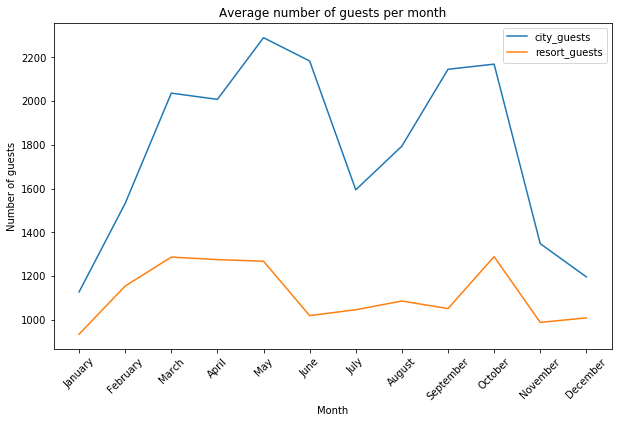

In [16]:
resort_guests = hotel_df[(hotel_df['hotel'] == 'Resort Hotel') & (hotel_df['is_canceled'] == 0)]
city_guests = hotel_df[(hotel_df['hotel'] == 'City Hotel') & (hotel_df['is_canceled'] == 0)]
resort_guests_monthly = resort_guests.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = city_guests.groupby("arrival_date_month")["hotel"].count()
monthly_guests = pd.DataFrame({'month':resort_guests_monthly.index,
                               'city_guests': city_guests_monthly.values,
                               'resort_guests':resort_guests_monthly.values})
months_in_order =  ["January", "February", "March", "April", "May", "June", 
                   "July", "August", "September", "October", "November", "December"]
monthly_guests['month'] = pd.Categorical(monthly_guests['month'], categories=months_in_order, ordered=True)
monthly_guests = monthly_guests.sort_values(by='month')
monthly_guests.loc[(monthly_guests["month"] == "July") | (monthly_guests["month"] == "August"),
                    ["resort_guests",'city_guests']] /= 3
monthly_guests.loc[~((monthly_guests["month"] == "July") | (monthly_guests["month"] == "August")),
                    ["resort_guests",'city_guests']] /= 2
monthly_guests = monthly_guests.set_index('month')
plt.figure(figsize=(10, 6))
sns.lineplot( hue='hotel',data=monthly_guests, dashes=False)
plt.title("Average number of guests per month")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Number of guests")

## 3.2 每月酒店平均房价

Text(0, 0.5, 'Average Price')

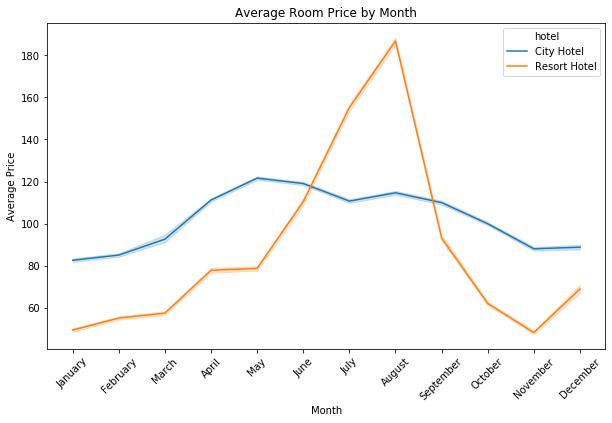

In [17]:
monthly_prices = hotel_df[['hotel','arrival_date_month','adr']].sort_values(by = 'arrival_date_month')
monthly_prices['arrival_date_month'] = pd.Categorical(monthly_prices['arrival_date_month'], 
                                                      categories=months_in_order, ordered=True)
plt.figure(figsize=(10, 6))
sns.lineplot(x = 'arrival_date_month', y='adr', hue='hotel',data=monthly_prices, dashes=False)
plt.title("Average Room Price by Month")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Average Price")

## 3.3 结论
综合以上两图可以看到，与度假酒店相比，城市酒店每个月的平均客人数更高。5月的客人人数最多，紧随其后的是10月，6月和9月。来宾最少的时间是1月和12月。相应房价也是1月和12月较低，因此最佳预定时间为1月与12月。

# 4 Logistic预测酒店预订

## 4.1 导入必须的库

In [18]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.linear_model import LogisticRegression # Logistic Regression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## 4.2 将数据集拆分为训练集和测试集
选取了数据集中和是否退订有关的13个属性。

In [19]:
X_features = hotel_df[['hotel','lead_time','arrival_date_week_number','stays_in_week_nights','meal','booking_changes','deposit_type',
                      'days_in_waiting_list','customer_type','is_repeated_guest','previous_cancellations','market_segment','adr']]
y_target = hotel_df.is_canceled
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, 
                                                    random_state=0, stratify=y_target)
print ("Dimension of Training Dataset: ", X_train.shape)
display(X_train.head())
print ("Dimension of Testing Dataset: ", X_test.shape)
display(X_test.head())

Dimension of Training Dataset:  (83573, 13)


,hotel,lead_time,arrival_date_week_number,stays_in_week_nights,meal,booking_changes,deposit_type,days_in_waiting_list,customer_type,is_repeated_guest,previous_cancellations,market_segment,adr
63764,City Hotel,32,8,1,BB,0,Non Refund,0,Transient,0,0,Groups,75.00
111758,City Hotel,129,19,2,SC,0,No Deposit,0,Transient,0,0,Online TA,120.00
5660,Resort Hotel,192,20,5,BB,0,No Deposit,0,Transient,0,0,Offline TA/TO,53.87
103383,City Hotel,0,52,1,BB,1,No Deposit,0,Group,0,0,Offline TA/TO,65.00
112677,City Hotel,146,21,3,BB,0,No Deposit,0,Transient,0,0,Direct,178.50


Dimension of Testing Dataset:  (35817, 13)


,hotel,lead_time,arrival_date_week_number,stays_in_week_nights,meal,booking_changes,deposit_type,days_in_waiting_list,customer_type,is_repeated_guest,previous_cancellations,market_segment,adr
2060,Resort Hotel,19,40,1,BB,1,No Deposit,0,Transient,0,0,Direct,106.00
32804,Resort Hotel,80,5,1,BB,0,No Deposit,0,Transient-Party,0,0,Online TA,63.65
9604,Resort Hotel,0,52,1,BB,0,No Deposit,0,Transient,0,0,Online TA,43.00
39265,Resort Hotel,262,32,5,HB,1,No Deposit,0,Transient,0,0,Direct,288.03
45354,City Hotel,61,44,1,BB,0,No Deposit,0,Transient,0,0,Offline TA/TO,72.24


## 4.3 列出参与的特征，并分为数值与标称

In [20]:
def num_cat(df):
    num_int_type = df.select_dtypes(include='int64').columns.tolist()
    num_float_type = df.select_dtypes(include='float64').columns.tolist()
    num_type = num_int_type + num_float_type
    cat_object_type = df.select_dtypes(include='object').columns.tolist()
    return num_type, cat_object_type
num_type_tn, cat_obj_type_tn = num_cat(X_train)
print("Features of Train Dataset:\n")
print(num_type_tn, cat_obj_type_tn)
num_type_tt, cat_obj_type_tt = num_cat(X_test)
print("\n\nFeatures of Test Dataset:\n")
print(num_type_tt, cat_obj_type_tt)

Features of Train Dataset:

['lead_time', 'arrival_date_week_number', 'stays_in_week_nights', 'booking_changes', 'days_in_waiting_list', 'is_repeated_guest', 'previous_cancellations', 'adr'] ['hotel', 'meal', 'deposit_type', 'customer_type', 'market_segment']


Features of Test Dataset:

['lead_time', 'arrival_date_week_number', 'stays_in_week_nights', 'booking_changes', 'days_in_waiting_list', 'is_repeated_guest', 'previous_cancellations', 'adr'] ['hotel', 'meal', 'deposit_type', 'customer_type', 'market_segment']


## 4.4 编码和缩放训练和测试的数据集

In [21]:
def num_cat_transformer(num_type, cat_object_type):
    num_transformer = make_pipeline(StandardScaler(),
                                    SimpleImputer(strategy='constant'))
    cat_transformer = make_pipeline(SimpleImputer(strategy='constant'),
                                    OneHotEncoder(sparse=False, handle_unknown='ignore'))
    column_transformer = make_column_transformer((num_transformer, num_type),
                                                   (cat_transformer, cat_object_type))
    return column_transformer

column_transformer_tn = num_cat_transformer(num_type_tn, cat_obj_type_tn)
X_train = pd.DataFrame(column_transformer_tn.fit_transform(X_train))
print("Encoded and Scaled of the Train dataset ")
display(X_train.head())

X_test = pd.DataFrame(column_transformer_tn.transform(X_test))
print("Encoded and Scaled of the Test dataset ")
display(X_test.head())

Encoded and Scaled of the Train dataset 


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.672125,-1.404730,-0.782613,-0.344709,-0.130554,-0.181455,-0.104208,-0.558452,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.237013,-0.596925,-0.260348,-0.344709,-0.130554,-0.181455,-0.104208,0.377188,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.827484,-0.523488,1.306446,-0.344709,-0.130554,-0.181455,-0.104208,-0.997788,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.972047,1.826493,-0.782613,1.212919,-0.130554,-0.181455,-0.104208,-0.766373,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.396347,-0.450051,0.261917,-0.344709,-0.130554,-0.181455,-0.104208,1.593521,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Encoded and Scaled of the Test dataset 


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.793968,0.945250,-0.782613,1.212919,-0.130554,-0.181455,-0.104208,0.086100,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.222242,-1.625041,-0.782613,-0.344709,-0.130554,-0.181455,-0.104208,-0.794442,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.972047,1.826493,-0.782613,-0.344709,-0.130554,-0.181455,-0.104208,-1.223797,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.483564,0.357755,1.306446,1.212919,-0.130554,-0.181455,-0.104208,3.870871,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.400321,1.238998,-0.782613,-0.344709,-0.130554,-0.181455,-0.104208,-0.615838,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 4.5 训练和预测数据集


Model: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
Before SMOTE:  Counter({0: 52616, 1: 30957})
After SMOTE:  Counter({1: 52616, 0: 52616})

 Precision obtained from CV on Train Data: 0.7767
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84     22550
           1       0.87      0.46      0.60     13267

    accuracy                           0.77     35817
   macro avg       0.81      0.71      0.72     35817
weighted avg       0.80      0.77      0.75     35817

ROC curve: 
Confusion Matrix Plot:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002C07F364C08>
Confusion Matrix: 
 [[21676   874]
 [ 7216  6051]]


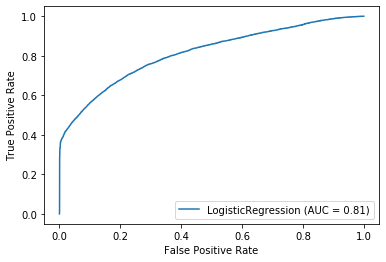

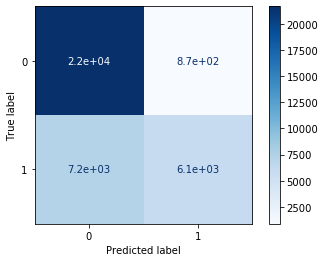

In [22]:
def upsampling_data(X, y):
    sm = SMOTE(sampling_strategy='auto', random_state=42)
    X_sm, y_sm = sm.fit_sample(X_train, y_train)
    print("Before SMOTE: ", Counter(y_train))
    print("After SMOTE: ", Counter(y_sm))
    return X_sm, y_sm

def train_model(model, X, y, num_procs, metrics):
    split2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    cv_score = cross_val_score(model, X, y,
                               cv=split2,
                               scoring=metrics,
                               n_jobs=-1).mean()
    return cv_score

def model_predict(model, X_trainn, y_trainn, X_topredict, y_true):    
    model.fit(X_trainn, y_trainn)
    y_pred = model.predict(X_topredict)
    class_report = classification_report(y_test, y_pred)
    disp_roc = plot_roc_curve(model, X_topredict, y_true)
    conf_matrix = plot_confusion_matrix(model, X_topredict, y_true, 
                                        cmap='Blues')
    return class_report, disp_roc, conf_matrix

models = []
mean_score = {}
std_dev = {}
num_procs = -1
verbose_lvl = 0
Logreg_model = LogisticRegression(random_state=42, n_jobs=-1)
models.extend([Logreg_model])
for model in models:
    print("\nModel: \n", model)
    X_train_sm, y_train_sm = upsampling_data(X_train, y_train)
    cv_score = train_model(model, X_train_sm, y_train_sm, num_procs,'precision')
    print("\n Precision obtained from CV on Train Data:", round(cv_score, 4))
    class_report, disp_roc, conf_matrix = model_predict(model, X_train, y_train, X_test, y_test)
    print("Classification Report:\n", class_report)
    print("ROC curve: \n", disp_roc)
    print("Confusion Matrix Plot: ", conf_matrix)
    print("Confusion Matrix: \n", conf_matrix.confusion_matrix)